<a href="https://colab.research.google.com/github/edwardchome/ml_deeplearning/blob/main/introducing_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import pylab as pl

digits = load_digits()

<Figure size 432x288 with 0 Axes>

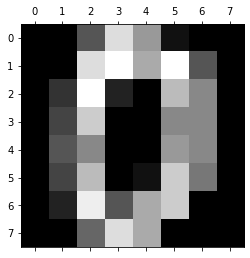

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
pl.gray()

pl.matshow(digits.images[0])
pl.show()
digits.images[0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
y = digits.target
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))

In [ ]:
x.shape

(1797, 64)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(1437, 64)
(360, 64)


In [ ]:
gnb = GaussianNB()
fit = gnb.fit(x_train,y_train)
predicted = fit.predict(x_test)

print(confusion_matrix(y_test,predicted))

print(accuracy_score(y_test,predicted))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  4  0]
 [ 0  7 17  0  0  0  0  0 12  0]
 [ 0  0  1 24  0  0  0  0  4  0]
 [ 0  1  0  0 22  0  0  7  0  0]
 [ 0  1  0  0  0 35  0  3  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  5  0  0  0  1  0  1 32  0]
 [ 0  2  0  3  0  0  0  3  7 26]]
0.825


In [ ]:
images_and_predictions = list(zip(digits.images,fit.predict(x)))

for index, (image,prediction) in enumerate(images_and_predictions[:6]):
 pl.subplot(6, 3, index +5)
 pl.axis('off')
 pl.imshow(image,cmap=pl.cm.gray_r, interpolation='nearest')
 pl.title('Prediction %i' % prediction)
 pl.show()


**Listing 3.5 Data acquisition and variable standardization**

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=";")

X = data[[u'fixed acidity', u'volatile acidity', u'citric acid',
u'residual sugar', u'chlorides', u'free sulfur dioxide',
u'total sulfur dioxide', u'density', u'pH', u'sulphates',
u'alcohol']]

y = data.quality

X= preprocessing.StandardScaler().fit(X).transform(X)
#data.head()

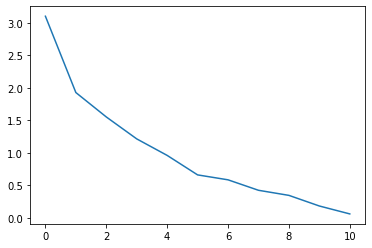

In [ ]:
model = PCA()
results = model.fit(X)
z = results.transform(X)

plt.plot(results.explained_variance_)
plt.show()

In [ ]:
pd.DataFrame(results.components_,columns=list([u'fixed acidity', u'volatile acidity', u'citric acid',
u'residual sugar', u'chlorides', u'free sulfur dioxide',
u'total sulfur dioxide', u'density', u'pH', u'sulphates',
u'alcohol']))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


**Wine score prediction before principal component analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import pylab as plt

gnb = GaussianNB()
fit = gnb.fit(X,y)
pred = fit.predict(X)
print(confusion_matrix(pred,y))
print(confusion_matrix(pred,y).trace())

[[  3   1   4   0   0   0]
 [  2   8  26  19   1   0]
 [  4  29 456 185  12   0]
 [  1  13 171 318  74   5]
 [  0   1  24 111 110  11]
 [  0   1   0   5   2   2]]
897


**Wine score prediction with increasing number of principal components**

[712]
[712, 816]
[712, 816, 903]
[712, 816, 903, 893]
[712, 816, 903, 893, 904]
[712, 816, 903, 893, 904, 920]
[712, 816, 903, 893, 904, 920, 930]
[712, 816, 903, 893, 904, 920, 930, 927]
[712, 816, 903, 893, 904, 920, 930, 927, 937]


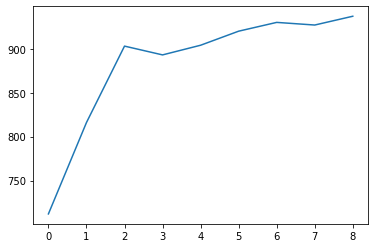

The results plot shows that adding more latent variables to a model (x-axis) greatly increases predictive power (y-axis) up to a point but then tails off. The gain in predictive power from adding variables wears off eventually.


In [ ]:
predicted_correct = []

for i in range(1,10):
  model = PCA(n_components = i)
  results = model.fit(X)
  z = results.transform(X)
  fit = gnb.fit(z,y)
  pred = fit.predict(z)
  predicted_correct.append(confusion_matrix(pred,y).trace())
  print(predicted_correct)

plt.plot(predicted_correct)
plt.show()
print("The results plot shows that adding more latent variables to "
+ "a model (x-axis) greatly increases predictive power (y-axis) up to a "
+"point but then tails off. The gain in predictive power from adding"
+" variables wears off eventually.")